In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression

In [24]:
os.getcwd()
os.chdir("C:/Users/HP/OneDrive - Michigan State University/Masters - Data Science/MSU/Fall/Data Mining/Project")

In [61]:
train=pd.read_csv("Train telecom.csv",index_col=0)
test=pd.read_csv("Test telecom.csv",index_col=0)

In [62]:
data = train.append([test])
data.shape

(3333, 19)

In [35]:
print(np.array(train.shape)[0]+np.array(test.shape)[0])


3333


In [63]:
#Drop account length, area code since not likely to influence churn
data=data.drop(["Area code"],axis=1)
list(data.columns)

['Account length',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [64]:
#Replacing Yes/No values with 1 and 0
data['International plan'] = data['International plan'].replace({"Yes":1,"No":0}).astype(int)
data['Voice mail plan'] = data['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)



In [65]:
#Replacing True/False values with 1 and 0
data['Churn'] = data['Churn'].replace({True:1,False:0}).astype(int)

In [56]:
data.head(4)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,
KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Region_by_cha'] =le.fit_transform(data['Region_by_cha'])
data['Region'] =le.fit_transform(data['Region'])
data['Division'] =le.fit_transform(data['Division'])


## Standardising X

In [67]:
X = data.drop(["International plan","Voice mail plan","Churn"], axis=1)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# We remove the target class(a categorical variable) before standardising the data
scaler.fit(X)
data_scaled=scaler.transform(X)

In [40]:
#Transfrom into a data frame again just to view standardised data
data_scaled=pd.DataFrame(data_scaled,columns=data.columns[:-1])
data_scaled.head(5)


,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.676489,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


In [9]:
Y=pd.DataFrame(churn.loc[:,'Churn'].reset_index(drop=True))
Y_test=pd.DataFrame(test.loc[:,'Churn'].reset_index(drop=True))

In [10]:
#Add back y before data split
churn=pd.concat([churn_scaled, Y], axis=1)
test=pd.concat([test_scaled, Y_test], axis=1)
#df_c = pd.concat([df_a.reset_index(drop=True), df_b], axis=1)

## Splitting Data Set

In [11]:
X_train = churn.drop(['Churn'],axis=1)
y_train= churn['Churn']

X_test = test.drop(['Churn'],axis=1)
y_test= test['Churn']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

NameError: name 'train_test_split' is not defined

## SMOTE Sampling to balance train data set before running Logistic Regression

SMOTE Sampling

In [13]:
from imblearn.over_sampling import SMOTE


os = SMOTE(random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no churn in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churn",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

length of oversampled data is  4556
Number of no churn in oversampled data 2278
Number of churn 2278
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

In [671]:
y_train.isnull().sum()

0

import statsmodels.api as sm
logit_model=sm.Logit(X_train,y_train)
result=logit_model.fit()
print(result.summary2())


In [15]:
def evaluate(y_test, y_pred):
    cm  = confusion_matrix(y_test, y_pred)
    num_correct = sum(cm[i][i] for i in range(1))
    acc = np.round(num_correct*100/cm.sum())
    
    #Precision = TruePositives /(TruePositives + FalsePositives)
    #Out of all positive predictions, what % is actually positive 
    prec= cm[1][1]/(cm[1][1] +cm[0][1])  #cm[row][column] if dataframe = cm_df.iloc[row][column]
    
    #recall= true positives/(true positives + false negatives)
    #Out of all actual positives what % is correctly predicted as +ve
    recall = cm[1][1]/(cm[1][1]+cm[1][0]) 
    
    global df
    
    evaluation = {
    'Prec': [prec],
    'Accuracy': [acc],
    'Recall': [recall]
    }
    
    df=pd.DataFrame(evaluation)
    
    return df

## Logistic Regression

##### Without class balancing

In [16]:
lr = LogisticRegression(penalty='none', random_state=1)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Evaluation = evaluate(y_test, y_pred)

print(cm)
print(Evaluation)


precision = precision_score(y_test, y_pred, average='binary') 

[[550  22]
 [ 76  19]]
       Prec  Accuracy  Recall
0  0.463415      82.0     0.2


##### With Class Balancing

In [17]:
lr = LogisticRegression(penalty='none',class_weight="balanced", random_state=1)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Evaluation = evaluate(y_test, y_pred)

print(cm)
print(Evaluation)


precision = precision_score(y_test, y_pred, average='binary') 





[[445 127]
 [ 24  71]]
       Prec  Accuracy    Recall
0  0.358586      67.0  0.747368


##### Confusion Matrix

Confusion matrix, without normalization
[[445 127]
 [ 24  71]]
Normalized confusion matrix
[[0.77797203 0.22202797]
 [0.25263158 0.74736842]]


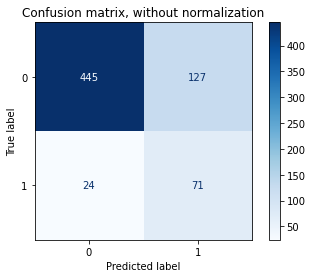

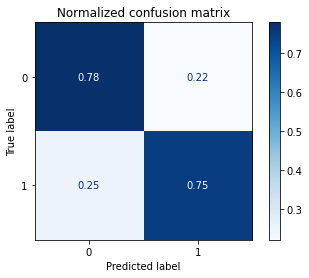

In [612]:
class_names= churn["Churn"].unique()
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## MLP Classifier

In [354]:
mlp = MLPClassifier(alpha=0.01, batch_size=200, hidden_layer_sizes=(700,),\
                    learning_rate='adaptive', max_iter=500, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
Evaluation = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Evaluation)

[[558  14]
 [ 32  63]]
       Prec  Accuracy    Recall
0  0.818182      84.0  0.663158


## Logistic Regression

In [504]:
### Stratified Sampling maintains proportion of classes in original dataset onto the test and train data sets
#X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=0.2,random_state=40)

In [613]:
lr = LogisticRegression(penalty='none',class_weight ="balanced", random_state=1)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Evaluation = evaluate(y_test, y_pred)

print(cm)
print(Evaluation)


[[445 127]
 [ 24  71]]
       Prec  Accuracy    Recall
0  0.358586      67.0  0.747368


In [614]:
lr = LogisticRegression(penalty='none',class_weight = {1:4}, random_state=1)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Evaluation = evaluate(y_test, y_pred)

print(cm)
print(Evaluation)

[[480  92]
 [ 29  66]]
       Prec  Accuracy    Recall
0  0.417722      72.0  0.694737


## Ridge

In [18]:
### Ridge Regression
lr = LogisticRegression(penalty='l2', solver='lbfgs', class_weight =" balanced", random_state=1,max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Evaluation = evaluate(y_test, y_pred)
print(cm)
print(Evaluation)

[[550  22]
 [ 78  17]]
       Prec  Accuracy    Recall
0  0.435897      82.0  0.178947


## RidgeClassifier

In [623]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=0.1, solver='saga', class_weight = "balanced", random_state=1,max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Evaluation = evaluate(y_test, y_pred)
print(cm)
print(Evaluation)

[[449 123]
 [ 24  71]]
       Prec  Accuracy    Recall
0  0.365979      67.0  0.747368


## Lasso

In [395]:
### Lasso Regression

lr = LogisticRegression(penalty='l1', class_weight= "balanced", solver='saga', random_state=1, max_iter = 1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cm  = confusion_matrix(y_test, y_pred)
Evaluation = evaluate(y_test, y_pred)
print(cm)
print(Evaluation)

[[447 125]
 [ 23  72]]
       Prec  Accuracy    Recall
0  0.365482      67.0  0.757895


In [164]:
churn["Churn"].value_counts()


0    572
1     95
Name: Churn, dtype: int64

In [167]:
percentage_churn = 95/(95+572) #0.1424
percentage_no_churn = 572/(95+572) #0.8575


## SVM

In [396]:
from sklearn.svm import SVC 
svm = SVC(kernel = 'linear', C = 1, class_weight={1: 4}, random_state=1)
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_test)
Evaluation = evaluate(y_test, y_pred)
#cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Evaluation)

[[447 125]
 [ 23  72]]
       Prec  Accuracy    Recall
0  0.409938      72.0  0.694737


## Random Forest

In [577]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,class_weight={1:5}, min_samples_split=7, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
Evaluation = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Evaluation)

[[567   5]
 [ 22  73]]
       Prec  Accuracy    Recall
0  0.935897      85.0  0.768421


## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [398]:
mlp = MLPClassifier(alpha=0.01, batch_size=200, hidden_layer_sizes=(700,),\
                    learning_rate='adaptive', max_iter=500, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
Evaluation = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Evaluation)

[[562  10]
 [ 35  60]]
       Prec  Accuracy    Recall
0  0.857143      84.0  0.631579


## KNN

In [583]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights = "distance")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
Evaluation = evaluate(y_test, y_pred)
precision_score(y_test,y_pred, average='binary')
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Evaluation)


[[557  15]
 [ 59  36]]
       Prec  Accuracy    Recall
0  0.705882      84.0  0.378947


In [402]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Evaluation)


[[538  34]
 [ 55  40]]
       Prec  Accuracy    Recall
0  0.822222      85.0  0.389474


## Gradient Boosting Classifier

Ensemble method that combines a number of weaker regression trees to build one powerful classifier

In [403]:
#from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
Evaluation = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Evaluation)

[[567   5]
 [ 32  63]]
       Prec  Accuracy    Recall
0  0.926471      85.0  0.663158


In [404]:
learning_rate = [0.01, 0.05, 0.1, 0.5, 0.8]
n_estimators = [5, 10, 20, 50, 100, 150]
min_samples_split = [2,5,7,10,20]

param_list = []

for learn_rate in learning_rate:
    for ne in n_estimators:
        for mss in min_samples_split:
            param_list.append([learn_rate, ne, mss])
                
len(param_list)

120

In [405]:
perf_df = pd.DataFrame(param_list, columns=['learning_rate', 'n_estimators', 'min_sample_split'])

recall = []
count = 0
for param in param_list:
    count += 1
    if count%30 == 0:
        print(count)
    gb = GradientBoostingClassifier(learning_rate=param[0], n_estimators=param[1],\
                                    min_samples_split=param[2], random_state=1)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    calc = recall_score(y_test, y_pred)
    recall.append(calc)
    
perf_df['recall'] = recall
perf_df.head()

30
60
90
120


,learning_rate,n_estimators,min_sample_split,recall
0,0.01,5,2,0.0
1,0.01,5,5,0.0
2,0.01,5,7,0.0
3,0.01,5,10,0.0
4,0.01,10,2,0.0


In [406]:
perf_df[perf_df.recall == perf_df.recall.max()]

,learning_rate,n_estimators,min_sample_split,recall
76,0.5,10,2,0.747368
77,0.5,10,5,0.747368
78,0.5,10,7,0.747368
79,0.5,10,10,0.747368
81,0.5,20,5,0.747368
86,0.5,50,7,0.747368
90,0.5,100,7,0.747368
93,0.5,150,5,0.747368
94,0.5,150,7,0.747368


In [410]:
gb = GradientBoostingClassifier(learning_rate=0.5, n_estimators=10, min_samples_split=2, random_state=1)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
Evaluation = evaluate(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
print(cm)
print(Evaluation)

[[562  10]
 [ 24  71]]
       Prec  Accuracy    Recall
0  0.876543      84.0  0.747368


In [625]:
df_combined_evaluation = pd.DataFrame({'L.Regression': [0.358586,     67.0,  0.747368],
                    'Ridge': [0.485714, 83.0, 0.178947],                  
                   'RidgeClassifier': [0.365979,67.0,0.747368],
                   'Lasso': [0.365482, 67.0 ,0.757895],
                   'SVM': [0.409938,72.0,0.694737],
                    'KNN': [0.822222,85.0,0.389474],
                   'GB_O': [0.926471,85.0,0.663158],
                    "Random Forest": [0.972973,85.0,0.757895],
                   'GB_2_samples': [0.876543,84.0,0.747368]},                   
                                      
                                      
                  index=['Precision', 'Accuracy', 'Recall'])

In [626]:
df_combined_evaluation

,L.Regression,Ridge,RidgeClassifier,Lasso,SVM,KNN,GB_O,Random Forest,GB_2_samples
Precision,0.358586,0.485714,0.365979,0.365482,0.409938,0.822222,0.926471,0.972973,0.876543
Accuracy,67.000000,83.000000,67.000000,67.000000,72.000000,85.000000,85.000000,85.000000,84.000000
Recall,0.747368,0.178947,0.747368,0.757895,0.694737,0.389474,0.663158,0.757895,0.747368


In [637]:
df_eval=df_combined_evaluation.T
df_eval= df_eval.reset_index(drop=False)
df_eval= df_eval.rename(columns={"index":"Model"})
df_eval["Precision"]= df_eval["Precision"]*100
df_eval["Recall"]= df_eval["Recall"]*100
df_eval=df_eval.sort_values("Recall")

#df_eval=df_eval.drop(["Precision"], axis=1)

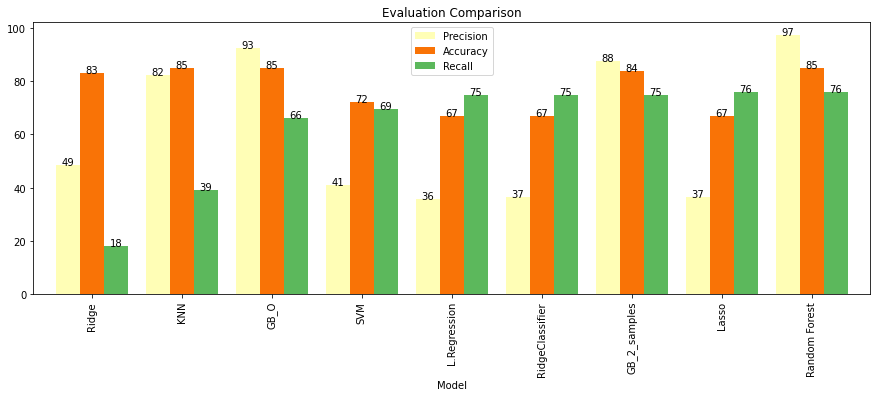

In [642]:
colors_list = ['#fffeb6','#f97306','#5cb85c']
plot= df_eval.plot(kind="bar", x="Model",figsize=(15,5),color=colors_list,width = 0.8)
plt.title("Evaluation Comparison")
plt.xlabel("Model")

# Add this loop to add the annotations
for p in plot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plot.annotate(f'{round(height)}', (x + width/2, y + height), ha='center')
    

